In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import cmasher as cmr 

<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_303444/3341774373.py:23: SyntaxWarning: invalid escape sequence '\d'
  label="$\\alpha = $ {} $\degree$".format(np.round(alpha*180/np.pi,1)))


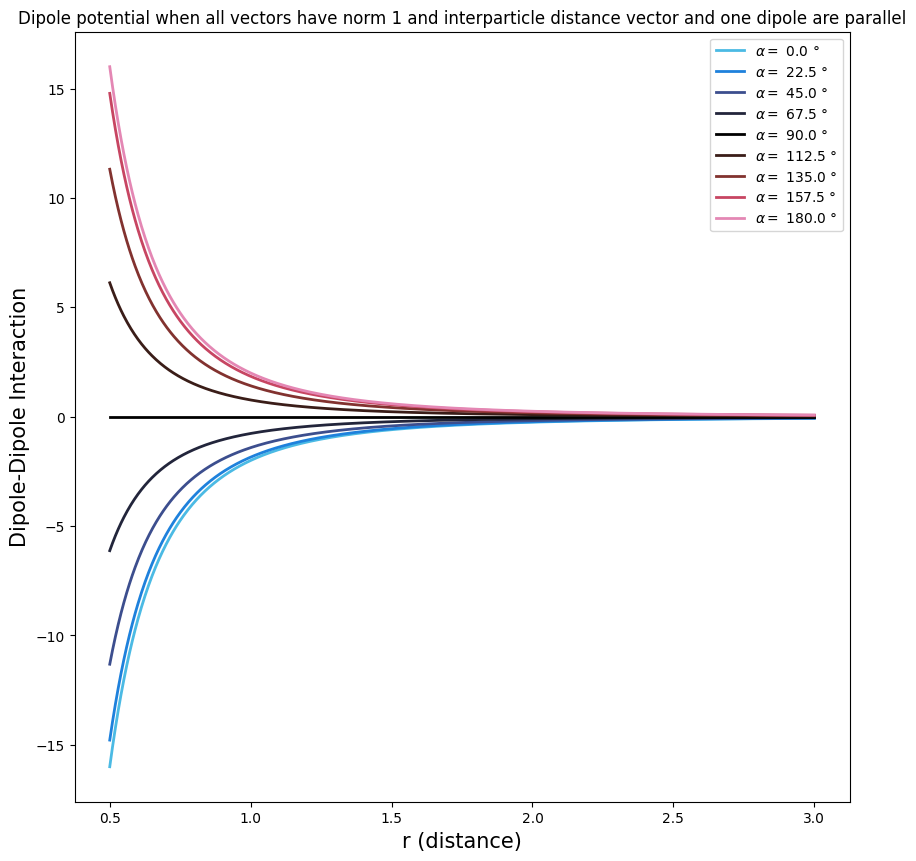

In [9]:

sns.set_palette('cmr.redshift',9)
# potential simplified as we assume that p1 and r are parallel 
def dipole_potential_parallel(R,alpha):
    norm_p1 = 1
    norm_p2 = 1 
    U = -1/np.power(R,3)*2*np.cos(alpha)
    return U

def dipole_potential_general(R,alpha,beta):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(alpha) - 3*np.cos(beta)*np.cos(alpha+beta))
    return U

# and  m1,m2 in 0,pi 
R=np.linspace(0.5,3,1000)
fig,ax = plt.subplots(figsize=(10,10))
for alpha in np.linspace(0,np.pi,9):
    beta=0
    U = dipole_potential_general(R,alpha,beta)
    ax.plot(R,U,
            lw=2,
            label="$\\alpha = $ {} $\degree$".format(np.round(alpha*180/np.pi,1)))

plt.ylabel("Dipole-Dipole Interaction",size=15)
plt.xlabel("r (distance)",size=15)
plt.title("Dipole potential when all vectors have norm 1 and interparticle distance vector and one dipole are parallel")
plt.legend()
plt.show()

    

In [ ]:

# alpha: angle between p1 and p2 
# beta: angle between p1 and r 
# gamma: in 2D given by alpha+beta  

def dipole_potential_general(R,alpha,beta):
    norm_p1=1 
    norm_p2=1 
    U = ((norm_p1*norm_p2)/np.power(R,3))*(np.cos(alpha) - 3*np.cos(beta)*np.cos(alpha+beta))
    return U


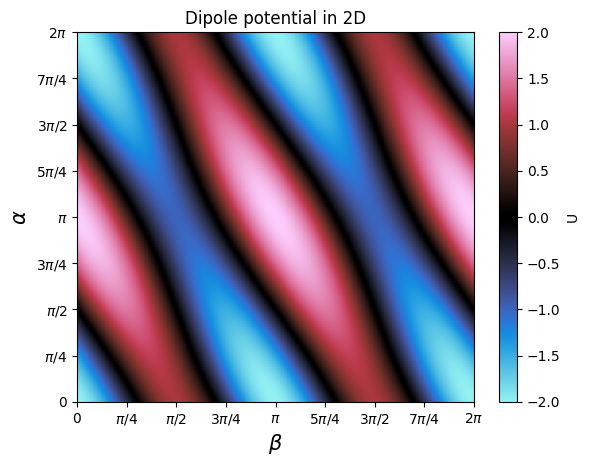

In [8]:

R=1
U=np.zeros((500,500))
Alpha = np.linspace(0,2*np.pi,500)
Beta = np.linspace(0,2*np.pi,500)


for i, alpha in enumerate(Alpha):
    for j, beta in enumerate(Beta):
        U[i,j] = dipole_potential_general(R,alpha,beta)


U_min, U_max = -2,2

fig, ax = plt.subplots()

c = ax.pcolormesh(Alpha, Beta, U, cmap='cmr.redshift', vmin=U_min, vmax=U_max)
ax.set_title('Dipole potential in 2D')
# set the limits of the plot to the limits of the data
ax.axis([Alpha.min(), Alpha.max(), Beta.min(), Beta.max()])
ax.set_xlabel("$\\beta$",size=15)
ax.set_ylabel("$\\alpha$",size=15)

ax.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
ax.set_yticks(np.arange(0, 2*np.pi+0.01, np.pi/4))
labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',
          r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

fig.colorbar(c, ax=ax, label="U")

